In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
from itertools import combinations
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.base import clone
from sklearn.metrics import accuracy_score

In [2]:
csv_data = '''A, B, C, D
              1.0, 2.0, 3.0, 4.0
              5.0, 6.0,,8.0
              10.0, 11.0, 12.0'''

In [3]:
df = pd.read_csv(StringIO(csv_data))
display(df)
print(df.isnull().sum())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


A     0
 B    0
 C    1
 D    1
dtype: int64


In [4]:
display(df.dropna(axis=0))

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [5]:
display(df.dropna(axis=1))

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [6]:
display(df.dropna(how='all'))

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [7]:
display(df.dropna(thresh=4))

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
df.dropna(subset=['C'])

KeyError: ['C']

In [ ]:
imr = SimpleImputer(strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
print(imputed_data)

In [9]:
df = pd.DataFrame([['Green', 'M', 10.1, 'class1'],
                    ['Red', 'L', 13.5, 'class2'],
                    ['Blue', 'XL', 15.3, 'class1']])
df.columns = ['Color', 'Size', 'Price', 'Class label']
df

,Color,Size,Price,Class label
0,Green,M,10.1,class1
1,Red,L,13.5,class2
2,Blue,XL,15.3,class1


In [10]:
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}
df['Size'] = df['Size'].map(size_mapping)
df

,Color,Size,Price,Class label
0,Green,1,10.1,class1
1,Red,2,13.5,class2
2,Blue,3,15.3,class1


In [11]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
inv_size_mapping

{3: 'XL', 2: 'L', 1: 'M'}

In [12]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['Class label']))}
class_mapping

{'class1': 0, 'class2': 1}

In [13]:
df['Class label'] = df['Class label'].map(class_mapping)
df

,Color,Size,Price,Class label
0,Green,1,10.1,0
1,Red,2,13.5,1
2,Blue,3,15.3,0


In [14]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
inv_class_mapping

{0: 'class1', 1: 'class2'}

In [15]:
class_le = LabelEncoder()
y = class_le.fit_transform(df['Class label'].values)
y

array([0, 1, 0], dtype=int64)

In [16]:
class_le.inverse_transform(y)

array([0, 1, 0], dtype=int64)

In [17]:
X = df[['Color', 'Size', 'Price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [18]:
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

C:\Users\Mikolaj\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Mikolaj\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [19]:
pd.get_dummies(df[['Price', 'Color', 'Size']])

,Price,Size,Color_Blue,Color_Green,Color_Red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [20]:
pd.get_dummies(df[['Price', 'Color', 'Size']], drop_first=True)

,Price,Size,Color_Green,Color_Red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [21]:
df_wine = pd.read_csv('datasets/r04/wine', header=None)
df_wine.columns = ['Class label',' Alcohol',
                   'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [22]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                            random_state=0, stratify=y)

In [23]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [24]:
ex = np.array([0, 1, 2, 3, 4, 5])
print('Standarized:', (ex - ex.mean()) / ex.std())
print('Normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

Standarized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
Normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [25]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [26]:
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Accuracy for train set:', lr.score(X_train_std, y_train))
print('Accuracy for test set:', lr.score(X_test_std, y_test))

Accuracy for train set: 1.0
Accuracy for test set: 1.0


In [27]:
display(lr.intercept_)
display(lr.coef_)

array([-1.26327282, -1.21600358, -2.37120508])

array([[ 1.24567382,  0.18065243,  0.74195238, -1.15975509,  0.        ,
         0.        ,  1.17418245,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54233148,  2.51102032],
       [-1.53695527, -0.38734999, -0.99531028,  0.36495203, -0.05956893,
         0.        ,  0.66777628,  0.        ,  0.        , -1.93395778,
         1.23417563,  0.        , -2.23167807],
       [ 0.13527347,  0.16966922,  0.35728677,  0.        ,  0.        ,
         0.        , -2.43440695,  0.        ,  0.        ,  1.56217235,
        -0.81644178, -0.49731782,  0.        ]])

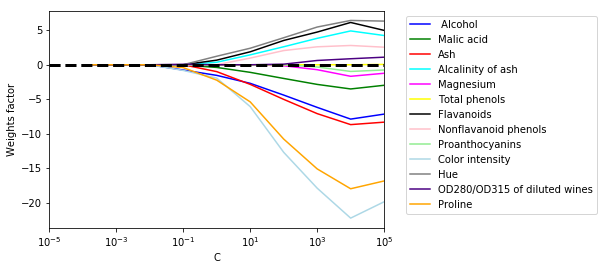

In [28]:
fig, ax = plt.subplots()
colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']
weights, params = [], []

for c in np.arange(-4.0, 6.0):
    lr = LogisticRegression(penalty='l1', C=10.0**c,
                            solver='liblinear', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.0**c)
    
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], color=color,
             label=df_wine.columns[column + 1])
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weights factor')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(1.35, 1.00))
plt.show()

In [29]:
class SBS():
    def __init__(self, estimator, k_features,
        scoring=accuracy_score,
        test_size=0.25, random_state=1):
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.scoring = scoring
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)
        
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transofrm(self, X):
        return X[:, self,indices_]
    
    def _calc_score(self, X_train, y_train,
                          X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

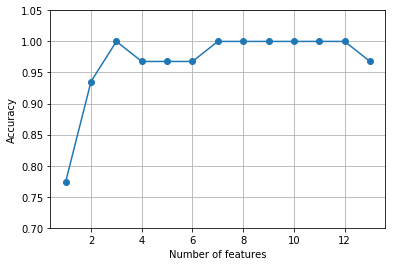

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.05])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [31]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index([' Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [32]:
knn.fit(X_train_std, y_train)
print('Accuracy on train set:', knn.score(X_train_std, y_train))
print('Accuracy on test set:', knn.score(X_test_std, y_test))

Accuracy on train set: 0.967741935483871
Accuracy on test set: 0.9629629629629629


In [33]:
knn.fit(X_train_std[:, k3], y_train)
print('Accuracy on train set:', knn.score(X_train_std[:, k3], y_train))
print('Accuracy on test set:', knn.score(X_test_std[:, k3], y_test))

Accuracy on train set: 0.9516129032258065
Accuracy on test set: 0.9259259259259259


 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5)  Alcohol                       0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


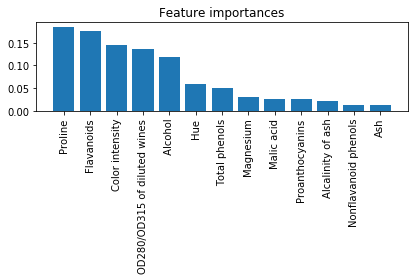

In [75]:
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))
    
plt.bar(feat_labels[indices], importances[indices])
plt.xticks(rotation=90)
#plt.xlim([-1, X_train.shape[1]])
plt.title('Feature importances')
plt.tight_layout()
plt.show()

In [79]:
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet threshold:', X_selected.shape[1])
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

Number of features that meet threshold: 5
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5)  Alcohol                       0.118529
